In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install umap-learn

import umap
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cleaned_kaggle_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Unnamed: 0,Topics,Date,bias_label,text,bias_prefix
0,0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,left
1,1,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,left
2,2,Elections,2012-08-16,left_story_text,The most emotionally powerful minute of Joe Bi...,left
3,3,Elections,2012-08-17,left_story_text,With the spotlight back on Mitt Romney's tax r...,left
4,4,US Congress,2012-08-20,left_story_text,The FBI probed a late-night swim in the Sea of...,left


In [ ]:
df.shape

(25434, 6)

In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'bias_label'])

In [ ]:
df = df[df['text'].str.len()>150]

In [ ]:
df1 = df[df["Topics"] == "Coronavirus"]

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device='cuda')
embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(embeddings)


In [ ]:
df1["cluster"] = cluster_labels


/tmp/ipython-input-2928431200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cluster"] = cluster_labels


In [ ]:
trial = df1[["text", "bias_prefix"]]
trial["cluster"] = cluster_labels
trial

/tmp/ipython-input-387697551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["cluster"] = cluster_labels


,text,bias_prefix,cluster
2764,"There are roughly 110,000 confirmed cases of t...",left,2
2767,OPINION\nThe coronavirus is no longer just a s...,left,2
2768,Nurses worried they were infected with COVID-1...,left,2
2769,"On both sides of the Atlantic on Thursday, the...",left,0
2772,(CNN) - President Donald Trump issued a federa...,left,0
...,...,...,...
24563,Former National Institutes of Health official ...,right,0
24646,Former National Institute of Allergy and Infec...,right,0
24877,Former New York governor Andrew Cuomo admitted...,right,0
25248,"On Tuesday, a Florida grand jury released its ...",right,1


In [ ]:
reducer = umap.UMAP(
    n_neighbors=20,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

emb2d = reducer.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
trial["x"] = emb2d[:, 0]
trial["y"] = emb2d[:, 1]
trial

,text,bias_prefix,cluster,x,y
2764,"There are roughly 110,000 confirmed cases of t...",left,2,13.183873,3.412690
2767,OPINION\nThe coronavirus is no longer just a s...,left,2,10.548249,3.935588
2768,Nurses worried they were infected with COVID-1...,left,2,11.505815,4.393394
2769,"On both sides of the Atlantic on Thursday, the...",left,0,9.603208,3.123920
2772,(CNN) - President Donald Trump issued a federa...,left,0,10.444626,3.981153
...,...,...,...,...,...
24563,Former National Institutes of Health official ...,right,0,11.319303,6.207888
24646,Former National Institute of Allergy and Infec...,right,0,11.014147,5.954010
24877,Former New York governor Andrew Cuomo admitted...,right,0,13.420420,5.326081
25248,"On Tuesday, a Florida grand jury released its ...",right,1,10.535700,2.441731


In [ ]:
import plotly.express as px

fig = px.scatter(
    trial,
    x="x",
    y="y",
    color="cluster",              # color points by predicted label
    hover_data={"bias_prefix": True}, # include true label in hover
    opacity=0.8,
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(
    title="UMAP Clusters Colored by Predicted Label (Hover Shows True Label)",
    legend_title="Predicted Label"
)

fig.show()


In [ ]:
def compute_entropy(label) :
    dist = trial[trial["bias_prefix"]=="left"].loc[:, "cluster"].value_counts()/sum(trial[trial["bias_prefix"]=="left"].loc[:, "cluster"].value_counts())
    this_entropy = sum((np.log(1/dist)/np.log(2)) * dist)
    return

dist = trial[trial["bias_prefix"]=="left"].loc[:, "cluster"].value_counts()/sum(trial[trial["bias_prefix"]=="left"].loc[:, "cluster"].value_counts())
this_entropy = sum((np.log(1/dist)/np.log(2)) * dist)
max_entropy = 3 * ((1/3)*(np.log(3)/np.log(2)))

max_entropy - this_entropy

NameError: name 'np' is not defined

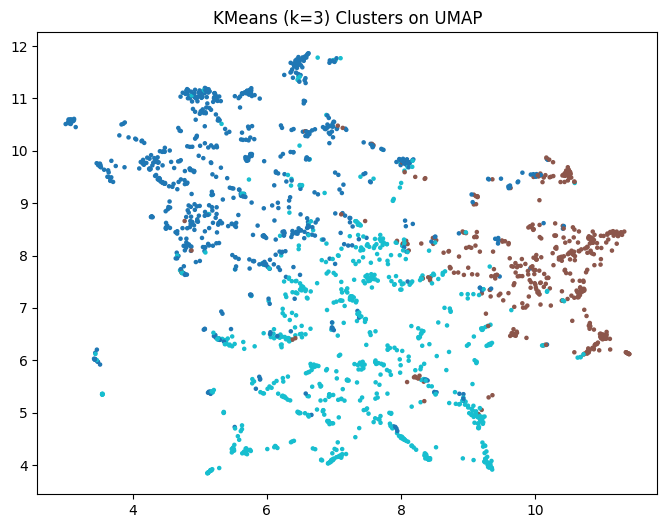

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    emb2d[:, 0],
    emb2d[:, 1],
    c=cluster_labels,
    s=5,
    cmap='tab10'
)
plt.title("KMeans (k=3) Clusters on UMAP")
plt.show()


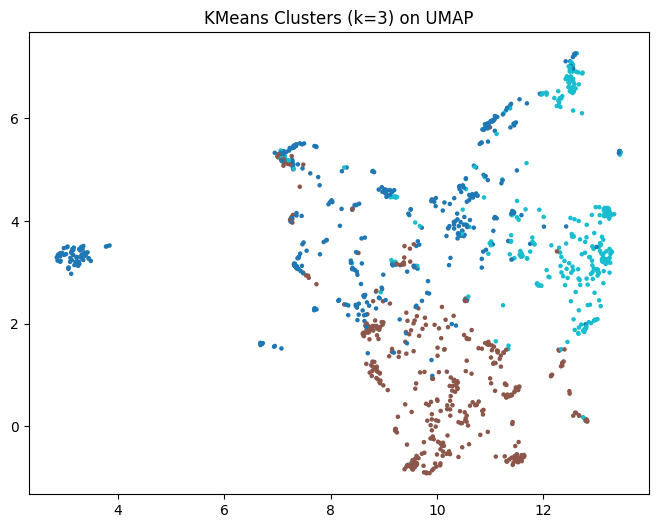

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    emb2d[:,0],
    emb2d[:,1],
    c=cluster_labels,
    s=5,
    cmap='tab10'
)
plt.title("KMeans Clusters (k=3) on UMAP")
plt.show()


In [ ]:
import numpy as np
embeddings = np.array(embeddings).astype("float32")
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

In [ ]:
embeddings

array([[ 0.0761684 , -0.00090354,  0.04992437, ..., -0.1118914 ,
        -0.0273652 ,  0.04313553],
       [ 0.07361195,  0.01883507,  0.01453988, ..., -0.06285221,
         0.04659107,  0.10287819],
       [ 0.0326234 , -0.02792298, -0.00635834, ..., -0.06955924,
         0.03195716,  0.04660017],
       ...,
       [ 0.05687126,  0.00013507,  0.01609766, ..., -0.05825434,
         0.07660908, -0.01207117],
       [-0.09478678, -0.01740861, -0.04989074, ..., -0.0090325 ,
         0.06019328,  0.0202936 ],
       [-0.0933456 , -0.03939268,  0.01293736, ..., -0.11057199,
         0.04474901, -0.01499539]], dtype=float32)

In [ ]:
df1['embedding'] = embeddings.tolist()

/tmp/ipython-input-1121972112.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.to_csv("df_embedded.csv")

In [ ]:
labels = df1['bias_prefix']

plt.figure(figsize=(8,6))
for label in labels.unique():
    idx = (labels == label)
    plt.scatter(emb_2d[idx,0], emb_2d[idx,1], s=5, label=label)

plt.legend()
plt.title("Embeddings colored by political bias")
plt.show()


NameError: name 'emb_2d' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd

# Count most frequent topics
top5 = df["Topics"].value_counts().head(5).index
top5


Index(['Politics', 'Elections', 'Economy and Jobs', 'Coronavirus', 'World'], dtype='object', name='Topics')

In [ ]:
mask = df["Topics"].isin(top5)

df_top5 = df[mask].reset_index(drop=True)
emb_top5 = embeddings[mask]


In [ ]:
reducer = umap.UMAP(
    n_neighbors=20,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

emb2d_top5 = reducer.fit_transform(emb_top5)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


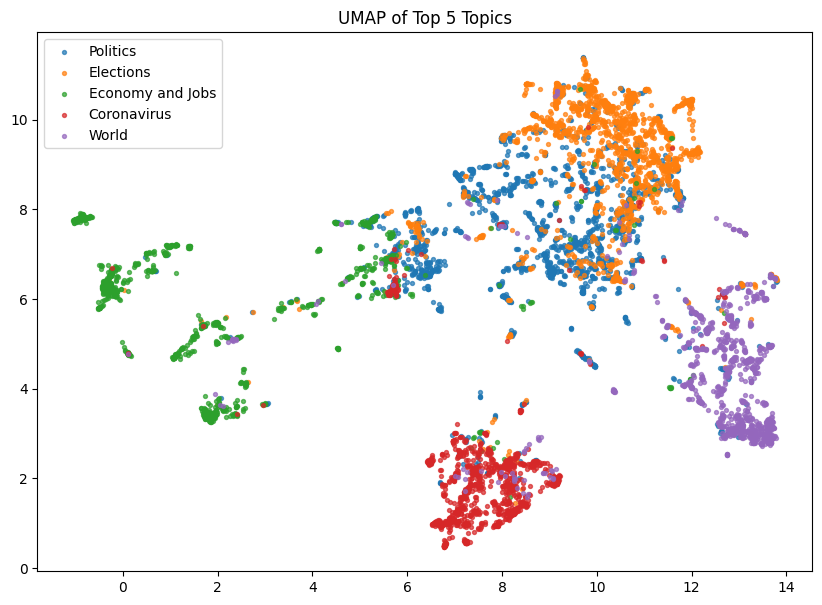

In [ ]:


plt.figure(figsize=(10, 7))

for topic in top5:
    idx = df_top5["Topics"] == topic
    plt.scatter(
        emb2d_top5[idx, 0],
        emb2d_top5[idx, 1],
        s=8,
        alpha=0.7,
        label=topic
    )

plt.legend()
plt.title("UMAP of Top 5 Topics")
plt.show()


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 59.3 MB/s eta 0:00:00


In [ ]:
import faiss

num_clusters = 3
dim = embeddings.shape[1]
kmeans = faiss.Kmeans(d=dim, k=3, niter=25, verbose=True)
kmeans.train(embeddings)

D, I = kmeans.index.search(embeddings, 1)
df["cluster_id"] = I.flatten()

In [ ]:
for c in range(num_clusters):
    print(f"\n🟢 Cluster {c} ({(df['cluster_id'] == c).sum()} articles)")
    sample_texts = df[df["cluster_id"] == c]["text"].head(3).tolist()
    for t in sample_texts:
        print("  •", t[:120], "...")


🟢 Cluster 0 (10989 articles)
  • Mitt Romney told British leaders he hopes to take in an Olympics swimming competition during his time in London. With no ...
  • OPINION
Warsaw (CNN) -- In the estimation of Mitt Romney and his top campaign aides, there were no gaffes, no mistakes,  ...
  • With the spotlight back on Mitt Romney's tax returns, Obama campaign manager Jim Messina reached out to the Romney campa ...

🟢 Cluster 1 (7007 articles)
  • Protesters angered by an anti-Islam film tried to storm the American embassy in Sana, the Yemeni capital, on Thursday, t ...
  • A timeline of the events suggests Romney was wrong in his accusation that the Obama administration's "first response" on ...
  • UNITED NATIONS Ã¢â‚¬â€ President Obama challenged the Arab world to use its newfound embrace of democracy to ensure pro ...

🟢 Cluster 2 (5296 articles)
  • The share of young adults without health insurance fell by one-sixth in 2011 from the previous year, the largest annual  ...
  • As we